In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# prevents warnings about future implementations from appearing
import warnings
warnings.filterwarnings('ignore', 'use_inf_as_na')

iris = sns.load_dataset('iris')
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [8]:
iris['sepal_length_class'] = pd.cut(iris.sepal_length, bins=[0, 5, 6.5, 10], labels = ['short', 'medium', 'long'])
iris['sepal_width_class'] = pd.cut(iris.sepal_width, bins=[0, 2.7, 3.4, 6], labels = ['thin', 'normal', 'thick'])

iris_1_tab = pd.crosstab(iris['sepal_length_class'],iris['sepal_width_class'])
iris_2_tab = iris_1_tab.transpose()


iris_1_tab["All flowers"] = iris_1_tab[iris_1_tab.columns].sum(axis=1)
iris_2_tab["All flowers"] = iris_2_tab[iris_2_tab.columns].sum(axis=1)

print(iris_1_tab)
print(iris_2_tab)

sepal_width_class   thin  normal  thick  All flowers
sepal_length_class                                  
short                  5      22      5           32
medium                26      45     17           88
long                   2      25      3           30
sepal_length_class  short  medium  long  All flowers
sepal_width_class                                   
thin                    5      26     2           33
normal                 22      45    25           92
thick                   5      17     3           25


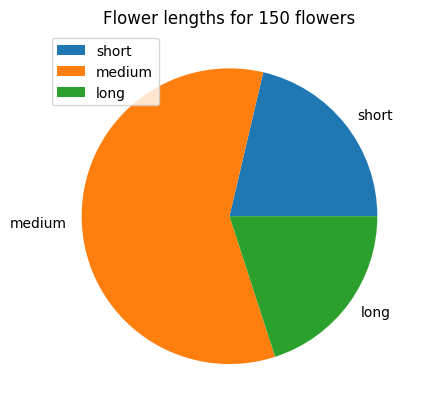

In [11]:
ax = iris_1_tab.plot.pie(y="All flowers")
ax.set_title("Flower lengths for 150 flowers")
ax.set_ylabel("")
plt.legend(loc="upper left")
plt.show()

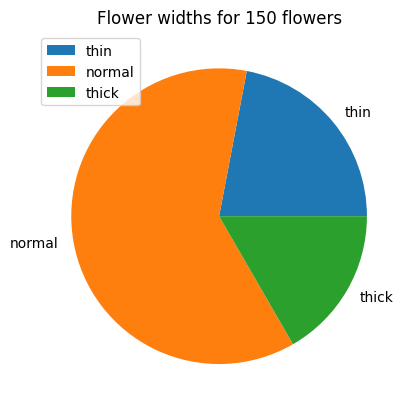

In [12]:
ax = iris_2_tab.plot.pie(y="All flowers")
ax.set_title("Flower widths for 150 flowers")
ax.set_ylabel("")
plt.legend(loc="upper left")
plt.show()

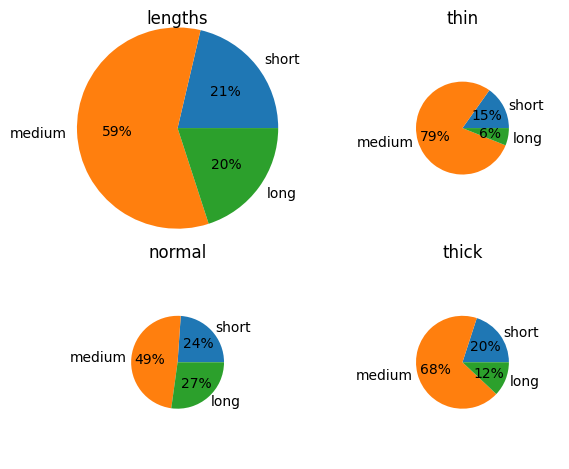

In [17]:
fig, ((pie1, pie2), (pie3, pie4)) = plt.subplots(2,2)

iris_1_tab.plot.pie(y='All flowers', legend=False, ylabel='', title='lengths', autopct='%.0f%%', radius=1.3, ax=pie1)
iris_1_tab.plot.pie(y='thin', legend=False, ylabel='', title='thin', autopct='%.0f%%', radius=.6, ax=pie2)
iris_1_tab.plot.pie(y='normal', legend=False, ylabel='', title='normal', autopct='%.0f%%', radius=.6, ax=pie3)
iris_1_tab.plot.pie(y='thick', legend=False, ylabel='', title='thick', autopct='%.0f%%', radius=.6, ax=pie4)
fig.tight_layout()
plt.show()